In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
import nltk

In [24]:
sr = pd.read_csv('/content/spotify_reviews.csv')

In [25]:
sr = sr[["content", "score"]]

In [26]:
sr.to_excel("score.xlsx")

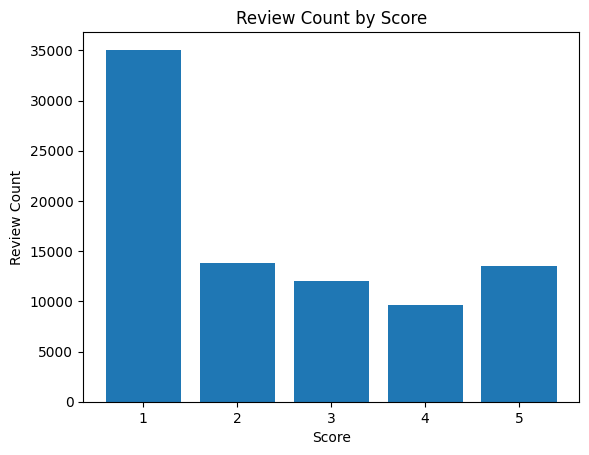

In [27]:
# Review count by score
review_count = sr["score"].value_counts().reindex([1, 2, 3, 4, 5], fill_value=0)
plt.bar(review_count.index, review_count.values)
plt.xlabel('Score')
plt.ylabel('Review Count')
plt.title('Review Count by Score')
plt.show()

In [28]:
# Calculate and print average score
avg_score = sr["score"].mean()
print("Average Score:", avg_score)

Average Score: 2.4396958355611003


In [29]:
sid = SentimentIntensityAnalyzer()

In [31]:
# Add columns for positive and negative sentiment scores
sr["pos"] = 0.0
sr["neg"] = 0.0

In [32]:
# Function to calculate VADER sentiment
def vader_sentiment(content):
    if isinstance(content, str):
        scores = sid.polarity_scores(content)
        return scores["pos"], scores["neg"]
    else:
        return 0.0, 0.0

In [33]:
# Apply VADER sentiment function
sr["pos"], sr["neg"] = zip(*sr["content"].apply(vader_sentiment))

In [37]:
# Filter positive and negative reviews
pos_sr = sr[sr["pos"] > 0.5]
neg_sr = sr[sr["neg"] > 0.5]

print("Number of Positive Reviews:", len(pos_sr))
print("Number of Negative Reviews:", len(neg_sr))

Number of Positive Reviews: 941
Number of Negative Reviews: 74


In [38]:
# Analysis of Positive Reviews
pos_reviews_sr = pos_sr["score"].value_counts().reindex([1, 2, 3, 4, 5], fill_value=0)
print("Positive Reviews by Score:\n", pos_reviews_sr)

Positive Reviews by Score:
 score
1     13
2      5
3     20
4     85
5    818
Name: count, dtype: int64


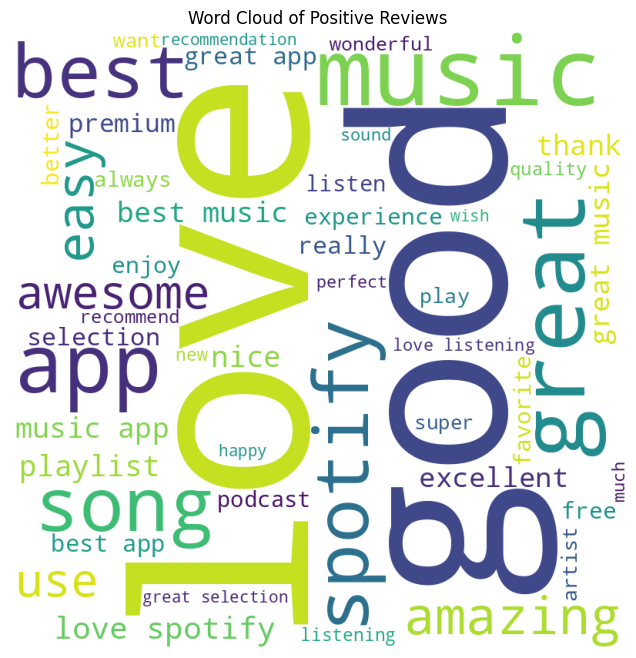

In [39]:
# Generate word cloud for positive reviews
pos_words = ' '.join(pos_sr['content'].dropna().astype(str).str.lower().values)
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, max_words=50, min_font_size=10).generate(pos_words)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Cloud of Positive Reviews")
plt.show()

Negative Reviews by Score:
 score
1    60
2     5
3     4
4     0
5     5
Name: count, dtype: int64


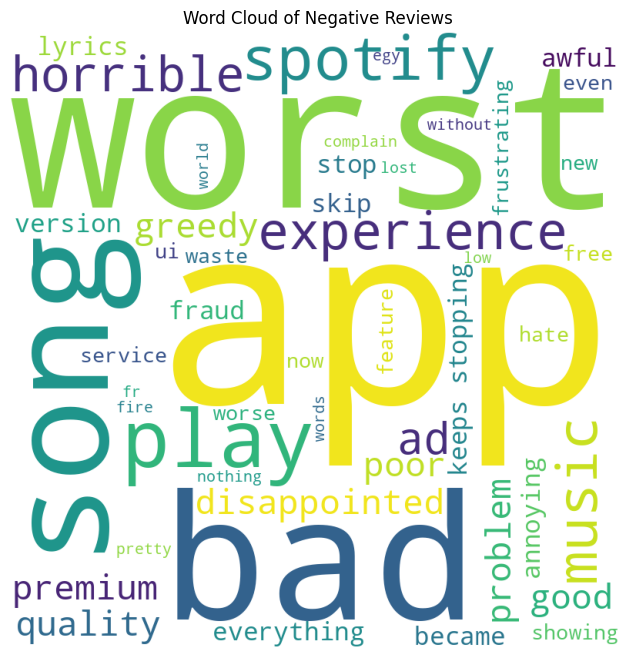

In [40]:
# Analysis of Negative Reviews
neg_reviews_sr = neg_sr["score"].value_counts().reindex([1, 2, 3, 4, 5], fill_value=0)
print("Negative Reviews by Score:\n", neg_reviews_sr)

# Generate word cloud for negative reviews
neg_words = ' '.join(neg_sr['content'].dropna().astype(str).str.lower().values)
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, max_words=50, min_font_size=10).generate(neg_words)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Cloud of Negative Reviews")
plt.show()
